In [1]:
import pandas as pd
import os 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

import torch
from torch import  nn
from torchvision import transforms ,datasets
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.optim.lr_scheduler as lr_scheduler
import joblib


device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [2]:
images=np.load("/home/yash/Downloads/Dataset PAAC/Galaxy10 datasets/DECals/images-001.npy")
labels=np.load("/home/yash/Downloads/Dataset PAAC/Galaxy10 datasets/DECals/labels.npy")

In [7]:
images_plot=images[2]

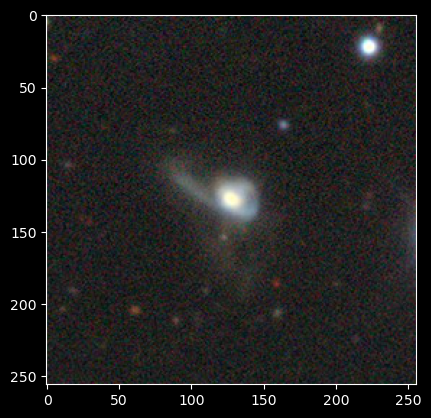

In [8]:
plt.imshow(images_plot)

In [9]:
labels

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [10]:
split_iamges=np.array_split(images,739)

In [11]:
transform=transforms.ToTensor()

transform=transforms.ToTensor()
images_ten=[]
for image in images:
    images_ten.append(transform(image))

i=0
for image in images:
    ScaledImages[i]=(((image-np.min(image))/(np.max(image)-np.min(image))))
    i+=1

In [9]:
class Autoencoders(nn.Module):
    def __init__(self):
        super().__init__()
        self.Encoders=nn.Sequential(
            nn.Conv2d(3,16,3),
            nn.ReLU(),
            nn.Conv2d(16,32,5),
            nn.ReLU(),
            nn.Conv2d(32,64,8),
            nn.ReLU(),
            nn.Conv2d(64,32,4),
            nn.ReLU(),
            nn.Conv2d(32,16,5),
            nn.ReLU(),
            nn.Conv2d(16,4,6)
        )

        self.Decoders=nn.Sequential(
            nn.ConvTranspose2d(4,16,6),
            nn.ReLU(),
            nn.ConvTranspose2d(16,32,5),
            nn.ReLU(),
            nn.ConvTranspose2d(32,64,4),
            nn.ReLU(),
            nn.ConvTranspose2d(64,32,8),
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,5),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,3),
        )

    def forward(self,Dataset):
        Encoded=self.Encoders(Dataset)
        Decoded=self.Decoders(Encoded)
        return(Decoded)

In [10]:
model=Autoencoders().to(device)
LossFunc=nn.MSELoss()
Optm=Adam(params=model.parameters(),lr=1e-3)

In [ ]:
epochs=20
outputs=[]

for epoch in range(epochs):
    for arr in split_iamges:
        for listarray in arr:
            
            listarray=np.array(listarray)
            listarray=transform(listarray)
            listarray=listarray.to(device)

            genimg=model(listarray)
            loss=LossFunc(genimg,listarray)

            Optm.zero_grad()
            loss.backward()
            Optm.step()

    print(f"Epochs:{epoch+1},Loss:{loss.item():4f}")
    outputs.append((epoch,listarray,genimg))
        
    

/home/yash/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Epochs:1,Loss:0.002234
Epochs:2,Loss:0.002212
Epochs:3,Loss:0.002116
Epochs:4,Loss:0.002072
Epochs:5,Loss:0.002022
Epochs:6,Loss:0.002031
Epochs:7,Loss:0.002170
Epochs:8,Loss:0.002263
Epochs:9,Loss:0.002119
Epochs:10,Loss:0.002017
Epochs:11,Loss:0.002013
Epochs:12,Loss:0.002150
Epochs:13,Loss:0.001822
Epochs:14,Loss:0.001789
Epochs:15,Loss:0.001730
Epochs:16,Loss:0.001738
Epochs:17,Loss:0.001696
Epochs:18,Loss:0.001672
Epochs:19,Loss:0.001811
Epochs:20,Loss:0.001824


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

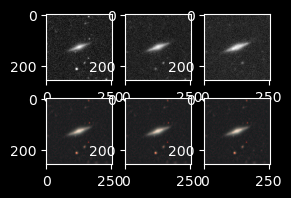

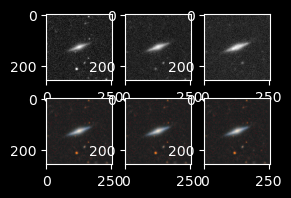

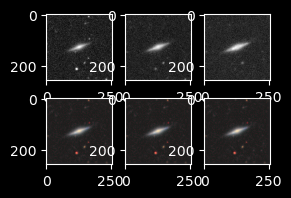

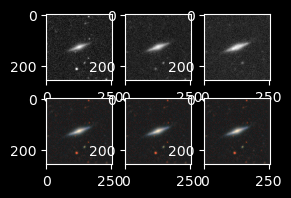

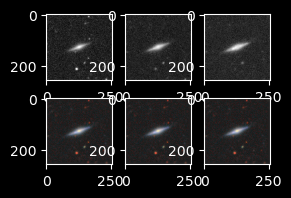

In [19]:


for k in range(0, epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = (outputs[k][1].to("cpu")).detach().numpy()
    recon = (outputs[k][2].to("cpu")).detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow((item))
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(recon.transpose(1,2,0))



In [27]:
torch.save(model.state_dict(),"Model")
joblib.dump(model.state_dict(),filename="Galaxy10Model")

['Galaxy10Model']